In [1]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is EE97-9493

 Directory of C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease

22-10-22  10:33 AM    <DIR>          .
28-09-22  08:07 PM    <DIR>          ..
22-10-22  10:03 AM    <DIR>          .ipynb_checkpoints
28-09-22  08:07 PM    <DIR>          fruit-dataset
22-10-22  10:33 AM             5,899 Untitled.ipynb
28-09-22  08:08 PM    <DIR>          Veg-dataset
               1 File(s)          5,899 bytes
               5 Dir(s)  160,126,849,024 bytes free


In [2]:
pwd


'C:\\Users\\maris_q3mm6nk\\Desktop\\FILES\\data_for_ibm\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [6]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is EE97-9493

 Directory of C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease

22-10-22  10:33 AM    <DIR>          .
28-09-22  08:07 PM    <DIR>          ..
22-10-22  10:03 AM    <DIR>          .ipynb_checkpoints
28-09-22  08:07 PM    <DIR>          fruit-dataset
22-10-22  10:33 AM             5,899 Untitled.ipynb
28-09-22  08:08 PM    <DIR>          Veg-dataset
               1 File(s)          5,899 bytes
               5 Dir(s)  160,126,529,536 bytes free


In [7]:
x_train=train_datagen.flow_from_directory(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [8]:
x_test=test_datagen.flow_from_directory(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [15]:
1238/24

51.583333333333336

In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 125s 554ms/step - loss: 0.0932 - accuracy: 0.9690 - val_loss: 0.1116 - val_accuracy: 0.9632
Epoch 2/10
225/225 [==============================] - 125s 555ms/step - loss: 0.0797 - accuracy: 0.9762 - val_loss: 0.2585 - val_accuracy: 0.9306
Epoch 3/10
225/225 [==============================] - 126s 561ms/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.1670 - val_accuracy: 0.9537
Epoch 4/10
225/225 [==============================] - 126s 560ms/step - loss: 0.0613 - accuracy: 0.9785 - val_loss: 0.0807 - val_accuracy: 0.9745
Epoch 5/10
225/225 [==============================] - 120s 533ms/step - loss: 0.0713 - accuracy: 0.9733 - val_loss: 0.0947 - val_accuracy: 0.9674
Epoch 6/10
225/225 [==============================] - 117s 521ms/step - loss: 0.0655 - accuracy: 0.9759 - val_loss: 0.0663 - val_accuracy: 0.9757
Epoch 7/10
225/225 [==============================] - 120s 535ms/step - loss: 0.0518 - accuracy: 0.9807 - val_loss: 0.1740 -

In [18]:
model.save('fruitdata.h5')


In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('fruitdata.h5')

In [21]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.jpg")


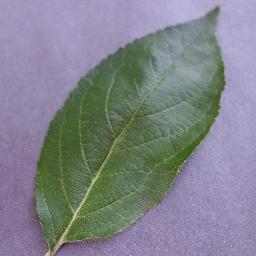

In [22]:
img

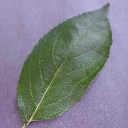

In [28]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.jpg",target_size=(128,128))
img

In [29]:
x=image.img_to_array(img)


In [30]:
x

array([[[165., 153., 189.],
        [165., 153., 189.],
        [165., 153., 189.],
        ...,
        [176., 170., 206.],
        [176., 170., 206.],
        [176., 170., 206.]],

       [[164., 152., 188.],
        [164., 152., 188.],
        [164., 152., 188.],
        ...,
        [173., 167., 203.],
        [172., 166., 202.],
        [172., 166., 202.]],

       [[163., 151., 187.],
        [163., 151., 187.],
        [163., 151., 187.],
        ...,
        [172., 166., 202.],
        [170., 164., 200.],
        [169., 163., 199.]],

       ...,

       [[135., 119., 156.],
        [139., 123., 160.],
        [134., 118., 155.],
        ...,
        [143., 133., 168.],
        [138., 128., 163.],
        [141., 131., 166.]],

       [[136., 120., 157.],
        [134., 118., 155.],
        [134., 118., 155.],
        ...,
        [141., 131., 166.],
        [141., 131., 166.],
        [146., 136., 171.]],

       [[135., 119., 156.],
        [140., 124., 161.],
        [143., 1

In [31]:
x=np.expand_dims(x,axis=0)


In [32]:
x

array([[[[165., 153., 189.],
         [165., 153., 189.],
         [165., 153., 189.],
         ...,
         [176., 170., 206.],
         [176., 170., 206.],
         [176., 170., 206.]],

        [[164., 152., 188.],
         [164., 152., 188.],
         [164., 152., 188.],
         ...,
         [173., 167., 203.],
         [172., 166., 202.],
         [172., 166., 202.]],

        [[163., 151., 187.],
         [163., 151., 187.],
         [163., 151., 187.],
         ...,
         [172., 166., 202.],
         [170., 164., 200.],
         [169., 163., 199.]],

        ...,

        [[135., 119., 156.],
         [139., 123., 160.],
         [134., 118., 155.],
         ...,
         [143., 133., 168.],
         [138., 128., 163.],
         [141., 131., 166.]],

        [[136., 120., 157.],
         [134., 118., 155.],
         [134., 118., 155.],
         ...,
         [141., 131., 166.],
         [141., 131., 166.],
         [146., 136., 171.]],

        [[135., 119., 156.],
       

In [33]:
x

array([[[[165., 153., 189.],
         [165., 153., 189.],
         [165., 153., 189.],
         ...,
         [176., 170., 206.],
         [176., 170., 206.],
         [176., 170., 206.]],

        [[164., 152., 188.],
         [164., 152., 188.],
         [164., 152., 188.],
         ...,
         [173., 167., 203.],
         [172., 166., 202.],
         [172., 166., 202.]],

        [[163., 151., 187.],
         [163., 151., 187.],
         [163., 151., 187.],
         ...,
         [172., 166., 202.],
         [170., 164., 200.],
         [169., 163., 199.]],

        ...,

        [[135., 119., 156.],
         [139., 123., 160.],
         [134., 118., 155.],
         ...,
         [143., 133., 168.],
         [138., 128., 163.],
         [141., 131., 166.]],

        [[136., 120., 157.],
         [134., 118., 155.],
         [134., 118., 155.],
         ...,
         [141., 131., 166.],
         [141., 131., 166.],
         [146., 136., 171.]],

        [[135., 119., 156.],
       

In [34]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 71ms/step


In [35]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [36]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [37]:
index[y[0]]

'Apple___healthy'

In [38]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 33ms/step


'Apple___healthy'